## Chapter 1.6: Creating models from scratch
***
So far we have shown the basics to create geological models by importing data from an external source (in especial GeoModeller 3D). In this chapter, we will explore the option available in GemPy to create the data directly in GemPy or to modify existing one. In this respect we will delve into the pandas DataFrames that contain the necessary data.

Let's start as always by importing the necessary dependencies:

In [4]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
import theano
import qgrid

In [5]:
#gp.save_model(geo_model, 'CreateModelTuto5', path=os.pardir+'/data/gempy_models')

In [6]:
data_path= '../..'
if False:
    geo_model = gp.load_model('Tutorial_ch1-6_CreatingModels', path=data_path+'/data/gempy_models')
else:
    geo_model = gp.create_model('Tutorial_ch1-6_CreatingModels')
    gp.init_data(geo_model, [0, 1000, 0, 1000, -1000, 0], [50, 50, 50])
    geo_model.set_default_surfaces()
    geo_model.set_default_orientation()
    geo_model.add_surface_points(400, 300, -500, 'surface1')
    geo_model.add_surface_points(600, 300, -500, 'surface1')


Active grids: ['regular']


Some default values but to make the model a bit faster but they are not necessary:

In [7]:
gp.set_interpolation_data(geo_model, theano_optimizer='fast_run',  verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1732.05
$C_o$            71428.6
drift equations      [3]


In [8]:
geo_model.additional_data

values
Structure isLith                                                        True
          isFault                                                      False
          number faults                                                    0
          number surfaces                                                  1
          number series                                                    1
          number surfaces per series                                     [1]
          len surfaces surface_points                                    [2]
          len series surface_points                                      [2]
          len series orientations                                        [1]
Options   dtype                                                      float64
          output                                                     geology
          theano_optimizer                                          fast_run
          device                                                         cpu
          verbosity                                                       []
Kriging   range                                                      1732.05
          $C_o$                                                      71428.6
          drift equations                                                [3]
Rescaling rescaling factor                                              1200
          centers                      [300.000005, 150.000005, -249.999995]

In [9]:
gp.compute_model(geo_model, debug=False,compute_mesh=False, sort_surfaces=False)


Lithology ids 
  [2. 2. 2. ... 1. 1. 1.] 

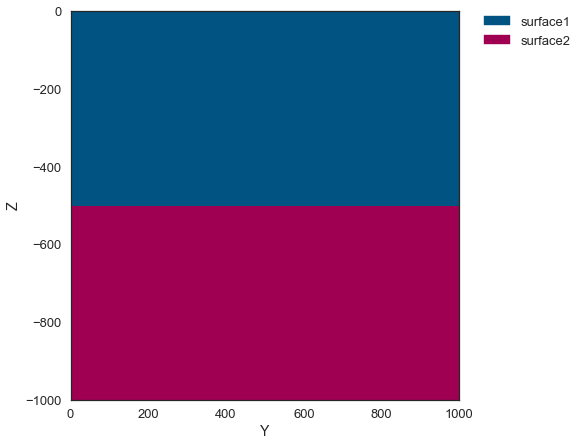

In [10]:
gp.plot.plot_section(geo_model, cell_number=25,
                         direction='x', show_data=True)


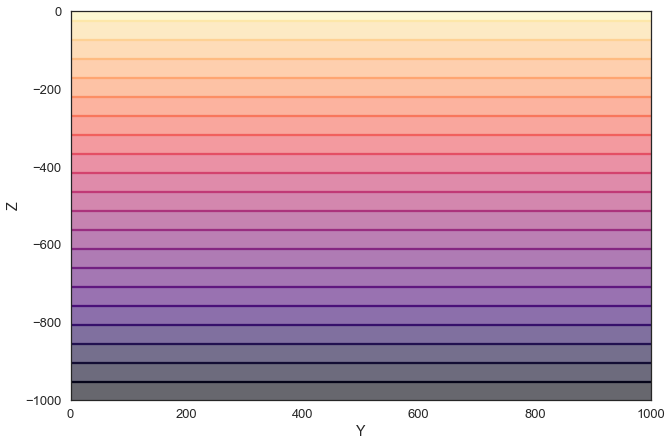

In [11]:
gp.plot.plot_scalar_field(geo_model, 25, direction='x', series=0)

In [12]:
vtk_object = gp.plot.plot_3D(geo_model, render_surfaces=True, silent=True)

In [13]:
vtk_object.real_time =True

In [14]:
geo_model.modify_surface_points(0, X=-500,
                               plot_object=vtk_object)

../../..\gempy\core\solution.py:284: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,-500.0,300.0,-500.0,0.2501,0.568282,0.386464,surface1,Default series,1,1,0.000001
1,600.0,300.0,-500.0,0.7501,0.568282,0.386464,surface1,Default series,1,1,0.000001


## Passing the vtk object to qgrid

In [15]:
gp.activate_interactive_df(geo_model, vtk_object)

It is important to get df with get to update the models sinde the `activate_interactive` method is called

In [16]:
geo_model.qi.get('orientations')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [17]:
geo_model.qi.get('surface_points')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [18]:
geo_model.qi.get('surfaces')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [19]:
geo_model.qi.get('series')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [20]:
geo_model.qi.get('faults')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [21]:
geo_model.qi.get('faults_relations')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Finite Fault parameters

In [22]:
geo_model.interpolator.theano_graph.not_l.set_value(1.)
vtk_object.update_model()

../../..\gempy\core\solution.py:284: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


In [23]:
geo_model.interpolator.theano_graph.ellipse_factor_exponent.set_value(50)

In [24]:
vtk_object.update_model()

### Topography

Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  10.        ,   10.        , -990.        ],
       [  10.        ,   10.        , -970.        ],
       [  10.        ,   10.        , -950.        ],
       ...,
       [ 950.        ,  990.        , -296.02584027],
       [ 970.        ,  990.        , -311.52380098],
       [ 990.        ,  990.        , -352.20808618]])

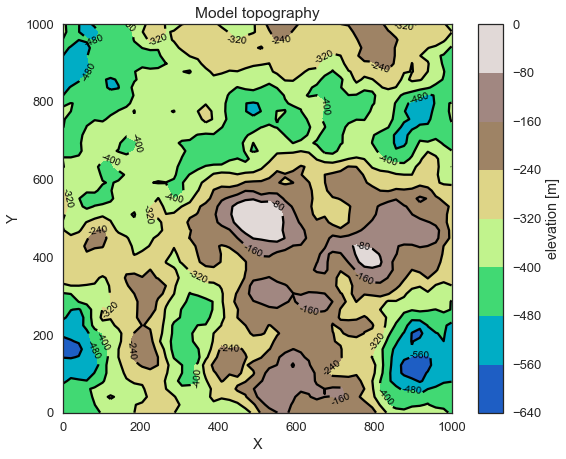

In [25]:
geo_model.set_topography(d_z=np.array([0,-600]))

In [26]:
geo_model.grid.active_grids

array([ True, False,  True, False, False])

In [27]:
gp.compute_model(geo_model)


Lithology ids 
  [2. 2. 2. ... 1. 1. 1.] 

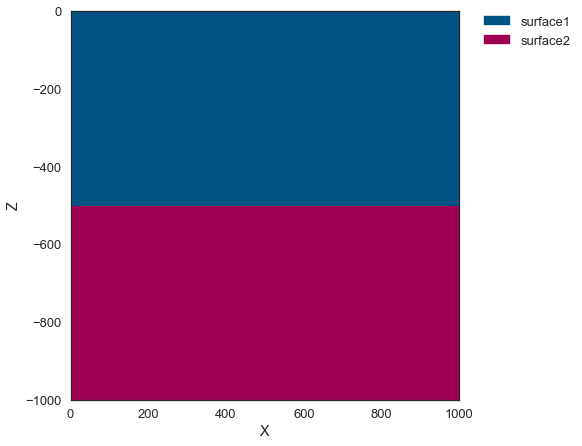

In [28]:
gp.plot.plot_section(geo_model)

104.50261213426796


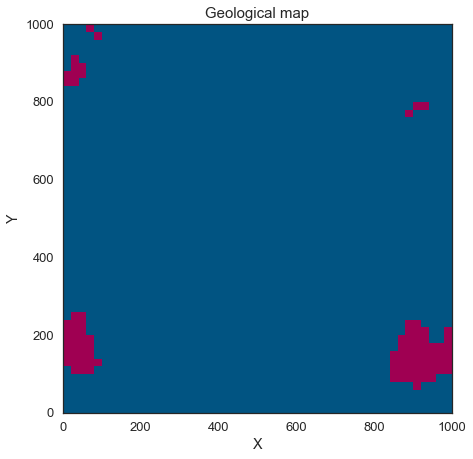

In [29]:
gp.plot.plot_map(geo_model)

### Adding Hillshades to Geological Map

Based on the loaded topography, hillshades will be calculated and can be added to support interpretations of the geological map. Please be aware that the resolution of hillshades are equal to the model resolution. The feature can be added by setting ```show_hillshades=True``` and optionally providing an ```azdeg``` (azimuth of sun for hillshade) and ```altdeg``` (altitude in degrees of sun for hillshade). The default values are shown below.

104.50261213426796


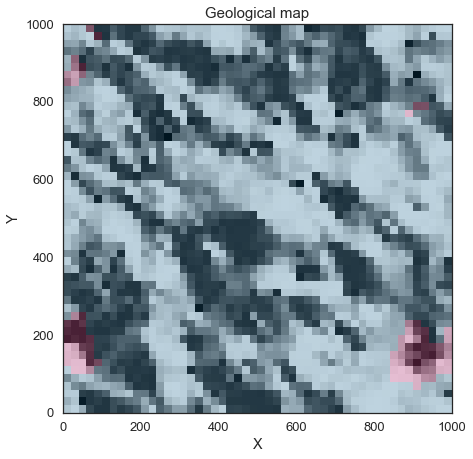

In [31]:
gp.plot.plot_map(geo_model, show_data=True, show_hillshades=True, azdeg=315, altdeg=45)
plt.title('Geological Map with Hillshades');

In [27]:
vtk_object.render_topography()

In [28]:
np.unique(geo_model.surface_points.df['id'])

array([1])

In [29]:
geo_model.surface_points

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,-500.0,300.0,-500.0,0.2501,0.568282,0.386464,surface1,Default series,1,1.0,1.000000e-08
1,600.0,300.0,-500.0,0.7501,0.568282,0.386464,surface1,Default series,1,1.0,1.000000e-08
